#Project Investigate a Dataset - [Medical Appointment No Shows]

##Table Of Contents

* [Introduction](https://colab.research.google.com/drive/1LCIQPWDFDB-zdoBn4GSHETln1OL7CyHz#scrollTo=9w_hZWsp3xD8&line=1&uniqifier=1)
* [Data Wrangling](https://colab.research.google.com/drive/1LCIQPWDFDB-zdoBn4GSHETln1OL7CyHz#scrollTo=kllHDaCP8pYW&line=1&uniqifier=1)
* [Exploratory Data Analysis](https://colab.research.google.com/drive/1LCIQPWDFDB-zdoBn4GSHETln1OL7CyHz#scrollTo=fjn-ec-1D0P4&line=20&uniqifier=1)
* [Conclusions](https://colab.research.google.com/drive/1LCIQPWDFDB-zdoBn4GSHETln1OL7CyHz#scrollTo=-ydCzauFW6qN&line=1&uniqifier=1)

##Introduction

### Dataset Description
> The **Medical Appointment No-Shows** dataset contains records of medical appointments in Brazil. It aims to address the question of why patients fail to attend their scheduled appointments. The dataset includes 14 features for analysis to help understand the factors influencing no-shows.

* **PatientId**: Unique identifier for the patient. _(Not an interesting feature)_
* **AppointmentID**: Unique identifier for the appointment. *(Not an interesting feature)*
* **Gender**: Indicates whether the patient is male or female.
* **AppointmentDay**: The scheduled date of the appointment.
* **ScheduledDay**: The date when the patient booked the appointment.
* **Age**: The patient's age.
* **Neighbourhood**: The patient's city or neighborhood.
* **Scholarship**: Indicates whether the patient is enrolled in the  Brazilian welfare program. *(True/False)*
* **Hipertension**: Indicates if the patient has high blood pressure. *(True/False)*
* **Alcoholism**: Indicates if the patient has an alcohol use disorder. *(True/False)*
* **Handicap**: Indicates whether the patient has any physical disability that may affect their arrival. *(True/False)*
**SMS_received**: Indicates whether the patient received one or more reminder messages. _(True/False)_
* **No-show**: Indicates whether the patient missed their appointment. _(True/False)_

### Question(s) for Analysis

* Which **gender** is most likely to book an appointment and **show up**?
* Is there a relationship between **Alcoholism** and **Hypertension**?
* Does **receiving an SMS** impact the patient's decision to attend their appointment?
* How does **age** affect appointment attendance?





In [4]:
# Import the important libraries for the data analysis
import numpy as np
import pandas as pd

df = pd.read_csv('KaggleV2-May-2016.csv') # Read an CSV file
df.head() # Print the first 5 rows of the dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Wrangling

This dataset consists of **110,527 records** and **14 features**, as described earlier. The data types are distributed as follows:  

- **8 integer (`int64`) features**: `AppointmentID`, `Age`, `Scholarship`, `Hypertension`, `Diabetes`, `Alcoholism`, `Handicap`, and `SMS_received`.  
- **1 floating-point (`float64`) feature**: `PatientID`.  
- **5 string (`object`) features**: `Gender`, `ScheduledDay`, `AppointmentDay`, `Neighbourhood`, and `No-show`.  

Additionally, the dataset contains **no missing values** and occupies approximately **11.8 MB** of memory.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Data cleaning

* As mentioned, `ScheduledDay` and `AppointmentDay` are recognized as strings instead of datetime objects, so they need to be converted to their correct data type for accurate analysis.  

* Additionally, most of the data types used are unnecessarily large, and we can downcast them to smaller types (e.g., `int8` instead of `int64`) to reduce memory consumption.  

* Moreover, `PatientID` and `AppointmentID`, which are stored as `float64`, take up significant memory but are not useful for our analysis. Removing these columns further optimizes memory usage.  

> After applying these conversions and improvements, the dataset's total memory usage is reduced from **11.8 MB to 5 MB**, making it more efficient for processing.

* Using the `describe()` method, an issue was identified where a patient's age was recorded as **-1**, which is not valid. To ensure data integrity, this record was removed from the dataset.

In [6]:
# Convert the date attributes to their corret data type
df.ScheduledDay = pd.to_datetime(df['ScheduledDay'])
df.AppointmentDay = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [7]:
# Optimize the dataset
df['Age'] = df['Age'].astype("int8")
df['Scholarship'] = df['Scholarship'].astype("bool")
df['Hipertension'] = df['Hipertension'].astype("bool")
df['Alcoholism'] = df['Alcoholism'].astype("bool")
df['Handcap'] = df['Handcap'].astype("bool")
df['SMS_received'] = df['SMS_received'].astype("bool")
df['Diabetes'] = df['Diabetes'].astype("bool")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int8               
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  bool               
 8   Hipertension    110527 non-null  bool               
 9   Diabetes        110527 non-null  bool               
 10  Alcoholism      110527 non-null  bool               
 11  Handcap         110527 non-null  bool               
 12  SMS_received    110527 non-null  bool               
 13  No-show       

In [8]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True) # Delete unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int8               
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  bool               
 6   Hipertension    110527 non-null  bool               
 7   Diabetes        110527 non-null  bool               
 8   Alcoholism      110527 non-null  bool               
 9   Handcap         110527 non-null  bool               
 10  SMS_received    110527 non-null  bool               
 11  No-show         110527 non-null  object             
dtypes: bool(6), datetime64[ns, UTC](2), int8(1), object(3)
memory usage: 5.0

In [10]:
df.describe()

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


In [11]:
df.drop(df[df["Age"] == -1].index, inplace=True) # Delete the paitent with -1 age.
df.describe()

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


## Exploratory Data Analysis


**Exploratory Data Analysis (EDA) on Medical Appointment No-Shows**

The dataset used in this analysis contains medical appointment records from Brazil, aiming to understand the factors influencing whether patients show up for their appointments. The dataset consists of 110,527 records and 14 features, including patient information such as age, gender, health conditions (e.g., hypertension, alcoholism), and appointment details like the scheduled and appointment days, SMS reminders, and more.

During the analysis, we explore key questions such as:

- The relationship between gender and appointment attendance.
- The connection between alcoholism and hypertension.
- The impact of receiving an SMS reminder on attendance.
- How age affects appointment attendance.

We also perform necessary data cleaning and optimizations, including handling missing values, converting data types for better memory usage, and identifying and removing anomalies, such as invalid age entries.

The insights gained from this analysis aim to provide a deeper understanding of patient behavior and the factors that influence appointment attendance, which can be valuable for improving healthcare services and patient management.




### Q1: Which gender is most likely to book an appointment and show up?

<Axes: ylabel='count'>

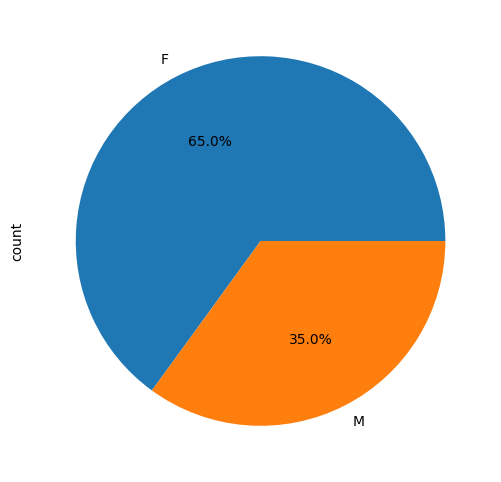

In [12]:
df['Gender'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(6, 6)) # To know the total precentage of each group

In [13]:
showedUp = df[df['No-show'] == 'No'] # filter based on who attend to the appo
showedUp.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No


In [14]:
showedUp["Gender"].value_counts()

,count
Gender,
F,57245
M,30962


<Axes: ylabel='count'>

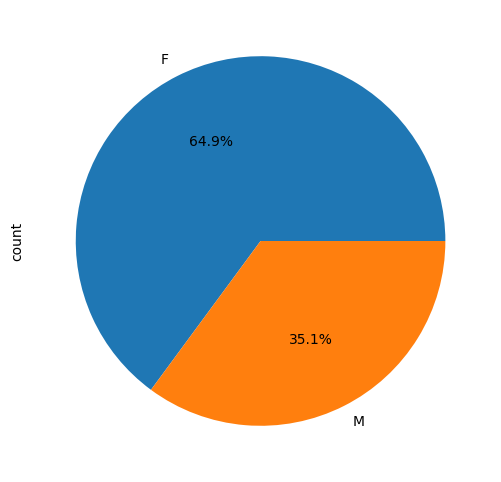

In [15]:
showedUp['Gender'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(6, 6))

As shown in the two figures above, **65% of patients who booked an appointment were female**, while only **35% were male**. This indicates that females are more likely to schedule medical appointments.  

Additionally, approximately **65% of females attended their appointments**, whereas only **35% of males showed up**. This suggests that **females tend to be more committed to attending their medical appointments** compared to males.

### Q2: Is there a relationship between Alcoholism and Hypertension?

In [16]:
df.groupby('Hipertension')['Alcoholism'].value_counts()

Hipertension  Alcoholism
False         False         86692
              True           2033
True          False         20474
              True           1327
Name: count, dtype: int64

<Axes: ylabel='Hipertension'>

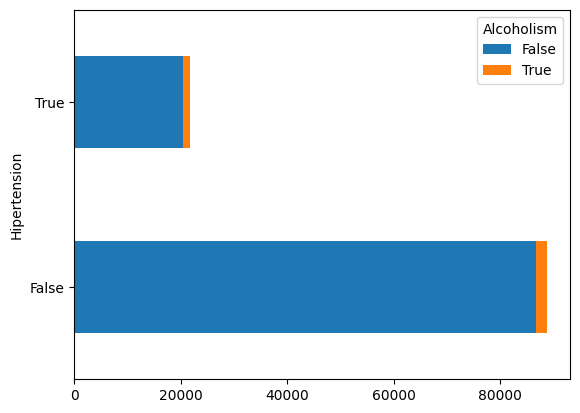

In [17]:
df.groupby(['Hipertension', 'Alcoholism']).size().unstack().plot(kind='barh', stacked=True)

To assess the relationship between **Alcoholism** and **Hypertension**, we grouped the dataset by **Hypertension** and counted the number of patients with **Alcoholism** in each category (hypertensive vs. non-hypertensive).  

Both the numerical results and the graphical representation show **no clear indication of a relationship** between these two features. This suggests that **having Alcoholism does not significantly impact whether a patient has Hypertension** based on the given dataset.

### Q3: Does receiving an SMS impact the patient's decision to attend their appointment?

In [18]:
receiviedMsg = df[df.SMS_received == True]
notReceiviedMsg = df[df.SMS_received == False]

In [19]:
receiviedMsg['No-show'].value_counts()

,count
No-show,
No,25698
Yes,9784


<Axes: xlabel='No-show'>

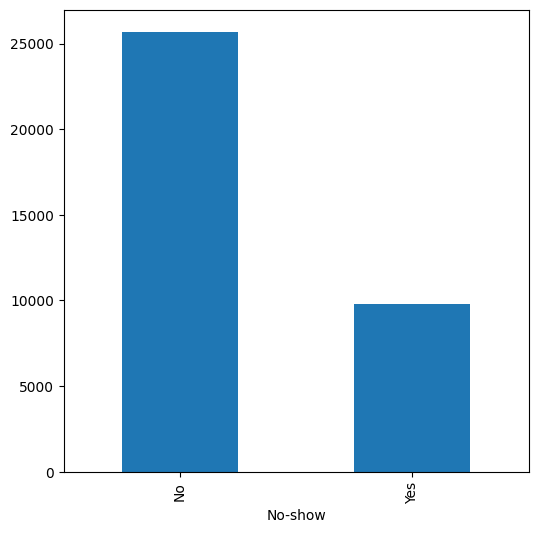

In [20]:
receiviedMsg['No-show'].value_counts().plot(kind="bar",figsize=(6, 6))

In [21]:
notReceiviedMsg['No-show'].value_counts()

,count
No-show,
No,62509
Yes,12535


<Axes: xlabel='No-show'>

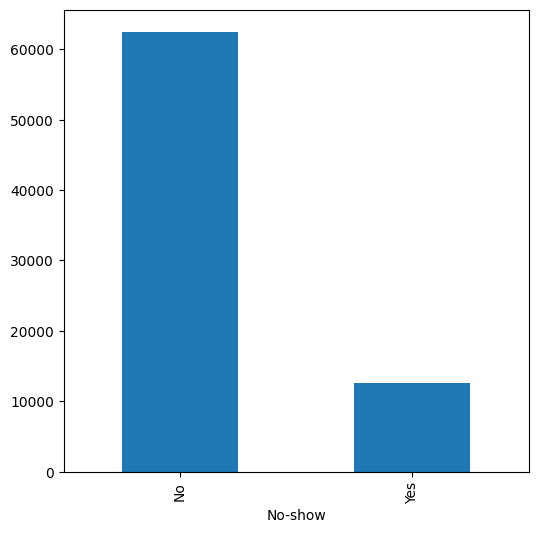

In [22]:
notReceiviedMsg['No-show'].value_counts().plot(kind="bar",figsize=(6, 6))

The comparison between **appointment attendance** and **receiving an SMS reminder** does not show a clear relationship between receiving a message and attending the appointment.  

As seen in the data:  
- **Approximately 62,000 patients who did not receive an SMS still attended their appointment.**  
- **Only about 25,000 patients who received an SMS showed up.**  

This suggests that **receiving a reminder message does not significantly influence a patient’s decision to attend their appointment**, at least based on the given dataset.

### Q4: How does age affect appointment attendance?

In [23]:
df['Age-Class'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 200], labels=['0-18', '19-30', '31-50', '50+'])

In [24]:
df.groupby('Age-Class')['No-show'].value_counts()

<ipython-input-24-e3eed74a1c61>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age-Class')['No-show'].value_counts()


Age-Class  No-show
0-18       No         19619
           Yes         5708
19-30      No         12622
           Yes         4143
31-50      No         23370
           Yes         6102
50+        No         29696
           Yes         5727
Name: count, dtype: int64

<ipython-input-25-968a4d26b408>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age-Class', 'No-show']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='Age-Class'>

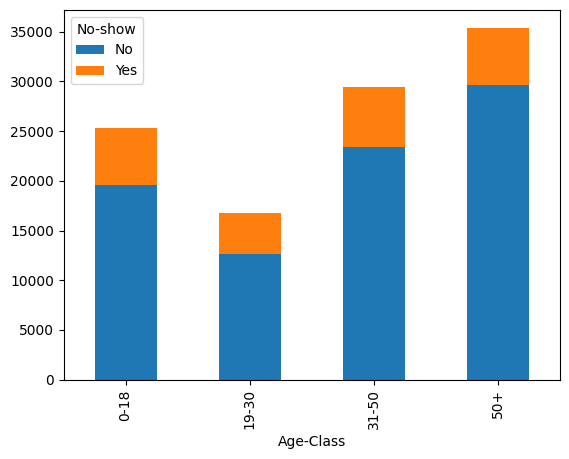

In [25]:
df.groupby(['Age-Class', 'No-show']).size().unstack().plot(kind='bar', stacked=True)

As shown in the figure above, after grouping the age into categories, the **19-30 years** age group had the **lowest attendance** rate for appointments, while the **50+ years** age group had the **highest attendance**. This suggests that individuals in the **19-30 age group** may be more likely to miss their appointments, possibly due to being **busy with work or life responsibilities**, which may take priority over attending medical appointments.

## Conclusion

Based on the findings from the exploratory data analysis, several key insights were gained regarding patient behavior in attending medical appointments:

1. **Gender and Appointment Attendance:** Females are not only more likely to schedule appointments but also show higher commitment to attending them compared to males. This suggests that females may prioritize their healthcare appointments more than males.

2. **Alcoholism and Hypertension:** There is no clear relationship between alcoholism and hypertension in the dataset. This indicates that having alcoholism does not seem to significantly influence the likelihood of having hypertension, based on the available data.

3. **SMS Reminders and Attendance:** Receiving an SMS reminder does not appear to significantly impact whether a patient attends their appointment. Despite receiving messages, a considerable number of patients still missed their appointments, highlighting that factors other than reminders may influence attendance.

4. **Age and Appointment Attendance:** The 19-30 age group had the lowest attendance rate, potentially due to life responsibilities or work commitments that may interfere with attending medical appointments. On the other hand, the 50+ age group showed the highest attendance, suggesting that older individuals may place a higher priority on healthcare.

Overall, these findings offer valuable insights into patient behavior and appointment attendance, which can inform healthcare strategies to improve patient engagement and reduce no-shows. Further analysis and intervention strategies may focus on specific age groups or target non-attending patients to enhance appointment adherence.